In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.style.use('seaborn-dark-palette')
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing The Dataset
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
df.shape

(400, 5)

<h3>We are avoiding the first two columns because our model will classify whether an item is purchased od not</h3>

In [7]:
X = df.iloc[:, [2,3]].values
Y = df.iloc[:, 4].values

In [8]:
print("Size of X: {}".format(X.shape))
print("Size of Y: {}".format(Y.shape))

Size of X: (400, 2)
Size of Y: (400,)


In [9]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.25, 
                                                    random_state=0)

In [10]:
print("Size of X_train: {}".format(X_train.shape))
print("Size of X_test: {}".format(X_test.shape))
print("Size of Y_train: {}".format(Y_train.shape))
print("Size of Y_test: {}".format(Y_test.shape))

Size of X_train: (300, 2)
Size of X_test: (100, 2)
Size of Y_train: (300,)
Size of Y_test: (100,)


In [11]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
#Build our Classifier
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
#Predicting The Results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [14]:
#Comparing the results
cm = confusion_matrix(y_pred, Y_test)
cm

array([[64,  3],
       [ 4, 29]], dtype=int64)

In [15]:
acc = accuracy_score(y_pred, Y_test)
print("The accuracy is: {}%".format(acc*100))

The accuracy is: 93.0%


<h3>Building a text report showing the main classification metrics</h3>

In [16]:
cr = classification_report(y_pred, Y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.94      0.96      0.95        67
          1       0.91      0.88      0.89        33

avg / total       0.93      0.93      0.93       100



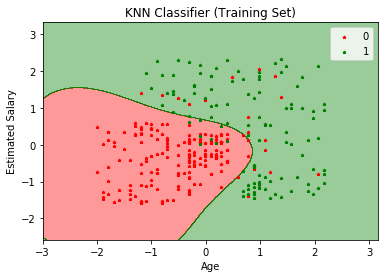

In [17]:
# Visualising the Training set results
x_set, y_set = X_train, Y_train

#Creating the grid of Minimum and maximun values from X_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1,
                              stop = x_set[:, 1].max() + 1,
                              step = 0.01))

#Plotting the line Classifier
plt.contourf(X1, 
             X2, 
             classifier.predict(np.array([X1.ravel(),
                                          X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.4,
            cmap = ListedColormap(('red', 'green')))

#Plotting The Datapoint in red and gree color
for i,j in  enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], 
                x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), 
                label = j,
                s = 8,
                marker = '*'
               )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("KNN Classifier (Training Set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

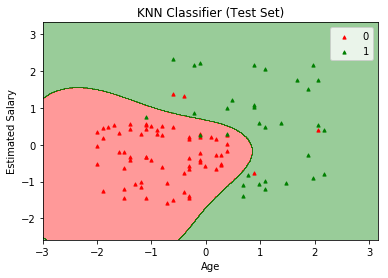

In [18]:
# Visualising the Test set results
x_set, y_set = X_test, Y_test

#Creating the grid of Minimum and maximun values from X_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1,
                              stop = x_set[:, 1].max() + 1,
                              step = 0.01))

#Plotting the line Classifier
plt.contourf(X1, 
             X2, 
             classifier.predict(np.array([X1.ravel(),
                                          X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.4,
            cmap = ListedColormap(('red', 'green')))

#Plotting The Datapoint in red and gree color
for i,j in  enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], 
                x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), 
                label = j,
                s = 10,
                marker = '^'
               )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("KNN Classifier (Test Set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()